In [2]:
# amacode:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
# Suppress FutureWarning messages#
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Required to visualize the decision tree
import pydotplus
from IPython.display import Image

In [4]:
# Call in the data
df = pd.read_csv("../../Data_Handling/Outputs/cars_sold_uk.csv")

df.head()

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
# Create the features set
X = df.copy()

X.drop("price", axis=1, inplace=True)
X.head()

,make,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [6]:
X = pd.get_dummies(X, dtype=int)

X.head()

,year,mileage,tax,mpg,engineSize,make_Audi,make_Bmw,make_Ford,make_Hyundai,make_Mercedes,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,36203,20,64.2,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,25952,145,67.3,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,1998,145,49.6,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
y = df['price'] #.values.reshape(-1,1)
y[:5]

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Create StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the scaler
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree

In [12]:
# Creating the decision tree regressor instance
model = tree.DecisionTreeRegressor()

In [13]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

In [20]:
# Making predictions using the testing data
y_pred = model.predict(X_test_scaled)

## Model Evaluation

In [21]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 6152437.55
R-squared (R2): 0.9335746945072864


## Visualize the Decision Tree

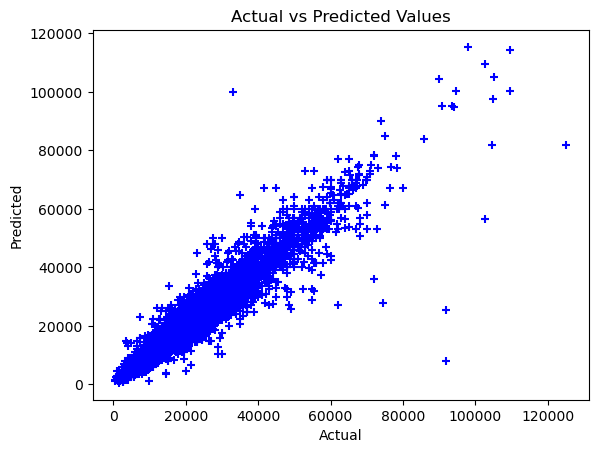

In [28]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', marker="+")

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [31]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), rounded=True, fontsize=10)
plt.show()